# CRISTIANO RONALDO'S CAREER 

In honor of the commander CR7, we'll take a look to his legendary career across the different teams in which he played in. 

### Import the libraries to use

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime


### Read the input data

In [2]:
df =pd.read_csv("/kaggle/input/cr7-cristiano-ronaldo-all-club-goals-stats/data.csv")
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,NaN
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3:0,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN,NaN


#### 1st glimpse of the data

We can see that each row in our DataFrame represents a goal, which can be described with the different columns in the data. Cleary we can see that there are null values in our data, so we'll have to clean this dataset.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            698 non-null    object
 1   Competition       698 non-null    object
 2   Matchday          698 non-null    object
 3   Date              698 non-null    object
 4   Venue             698 non-null    object
 5   Club              698 non-null    object
 6   Opponent          698 non-null    object
 7   Result            698 non-null    object
 8   Playing_Position  641 non-null    object
 9   Minute            698 non-null    object
 10  At_score          698 non-null    object
 11  Type              683 non-null    object
 12  Goal_assist       458 non-null    object
dtypes: object(13)
memory usage: 71.0+ KB


In [4]:
df.Type.value_counts()

Right-footed shot         251
Penalty                   128
Header                    112
Left-footed shot          110
Direct free kick           48
Tap-in                     14
Long distance kick          9
Counter attack goal         4
Penalty rebound             3
Solo run                    2
Deflected shot on goal      2
Name: Type, dtype: int64

In [5]:
assists = df.Goal_assist

In [6]:
na_df = df

In [7]:
df = df.drop('Goal_assist', axis = 'columns')

In [8]:
df = df.dropna()

In [9]:
df.shape

(635, 12)

In [10]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3:0,Header
5,03/04,Premier League,11,11/1/03,H,Manchester United,Portsmouth FC,3:0,RW,80,2:0,Direct free kick
6,03/04,FA Cup,Fifth Round,2/14/04,H,Manchester United,Manchester City,4:2,RW,74,3:0,Right-footed shot
10,03/04,FA Cup,Final,5/22/04,H,Manchester United,Millwall FC,3:0,RW,44,1:0,Header


In [11]:
df.Date = [datetime.strptime(date,"%m/%d/%y") for date in df.Date]

In [12]:
na_df.Date = [datetime.strptime(date,"%m/%d/%y") for date in na_df.Date]

In [13]:
df.Date

0     2002-10-07
1     2002-10-07
5     2003-11-01
6     2004-02-14
10    2004-05-22
         ...    
693   2022-04-16
694   2022-04-16
695   2022-04-23
696   2022-04-28
697   2022-05-02
Name: Date, Length: 635, dtype: datetime64[ns]

In [14]:
df.Competition.value_counts()


LaLiga                   297
UEFA Champions League    140
Serie A                   81
Premier League            67
Copa del Rey              21
FA Cup                     7
FIFA Club World Cup        7
Supercopa                  4
Italy Cup                  4
Liga Portugal              2
UEFA Super Cup             2
Supercoppa Italiana        2
EFL Cup                    1
Name: Competition, dtype: int64

#### CR7 GOALS ACCROSS THE YEARS

<AxesSubplot:xlabel='Year', ylabel='Goals'>

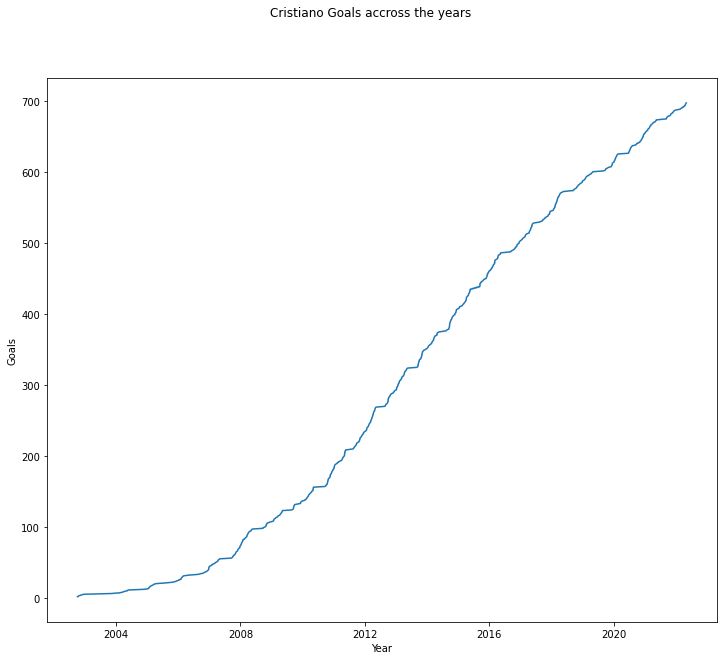

In [15]:
plt.figure(figsize=(12,10))
plt.suptitle('Cristiano Goals accross the years')
plt.xlabel('Year')
plt.ylabel('Goals')
sns.lineplot(data = na_df,x = 'Date', y = list(range(1,699)))


#### CR7'S FAVORITE COMPETITION

As you can expect, CR7's goals focus on the UEFA CHAMPIONS LEAGUE and LA LIGA BBVA. Guess that's why they call him Mr. Champions.

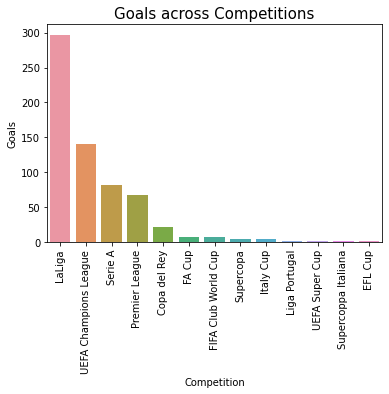

In [16]:

sns.countplot(x = df.Competition, order=df.Competition.value_counts().sort_values(ascending=False).index)
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Goals across Competitions',fontsize=15)
plt.xlabel('Competition')
plt.ylabel('Goals')
plt.xticks(rotation=90)
sns.set_style('whitegrid')


#### CR7 has scored goals that most football players ever dream of scoring. In the biggest of matches, when you need Cristiano, he is always there. Let's see what type of goals are his favorite kind.

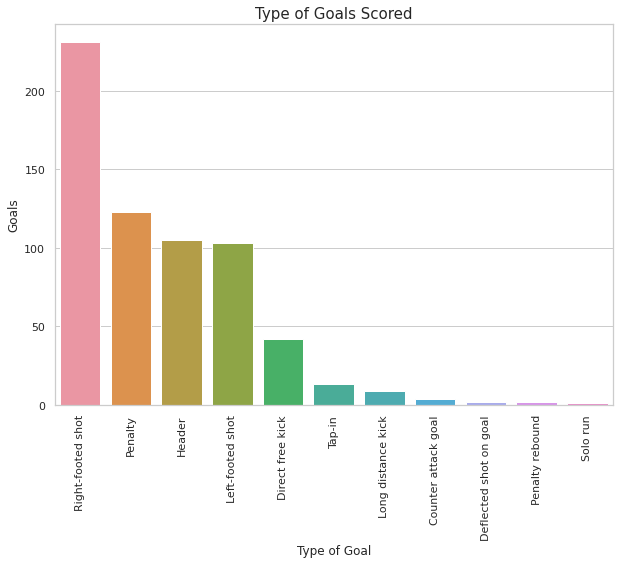

In [17]:
sns.countplot(x = df.Type, order=df.Type.value_counts().sort_values(ascending=False).index)
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Type of Goals Scored',fontsize=15)
plt.xlabel('Type of Goal')
plt.ylabel('Goals')
plt.xticks(rotation=90)
sns.set_style('whitegrid')


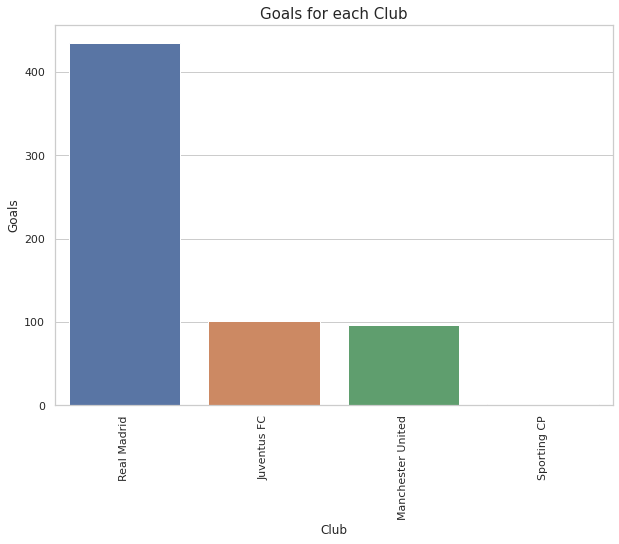

In [18]:
sns.countplot(x = df.Club,order=df.Club.value_counts().sort_values(ascending=False).index)
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Goals for each Club',fontsize=15)
plt.xlabel('Club')
plt.ylabel('Goals')
plt.xticks(rotation=90)
sns.set_style('whitegrid')

In [19]:
venue_df = np.where(na_df.Venue.str.contains('H'),'Home','Away')

In [20]:
goals_by_club = na_df.groupby(['Club', venue_df])

In [21]:
goals_by_club 

In [22]:
agg_count = goals_by_club.size().unstack().fillna(0)

In [23]:
agg_count

,Away,Home
Club,,
Juventus FC,44,57
Manchester United,51,91
Real Madrid,200,250
Sporting CP,1,4


<AxesSubplot:ylabel='Club'>

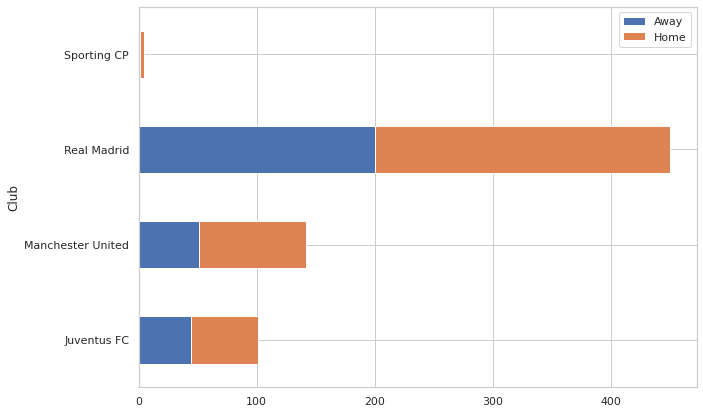

In [24]:
agg_count.plot(kind='barh', stacked = True)

<AxesSubplot:ylabel='Club'>

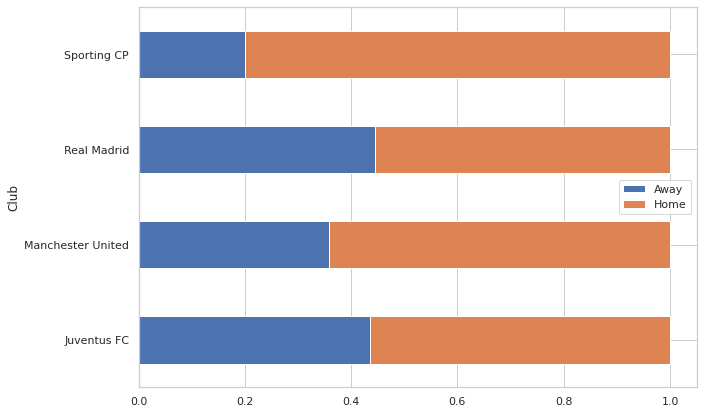

In [25]:
# Tabla normalizada 
normed_subset = agg_count.div(agg_count.sum(1), axis = 0)
normed_subset.plot(kind='barh', stacked = True)

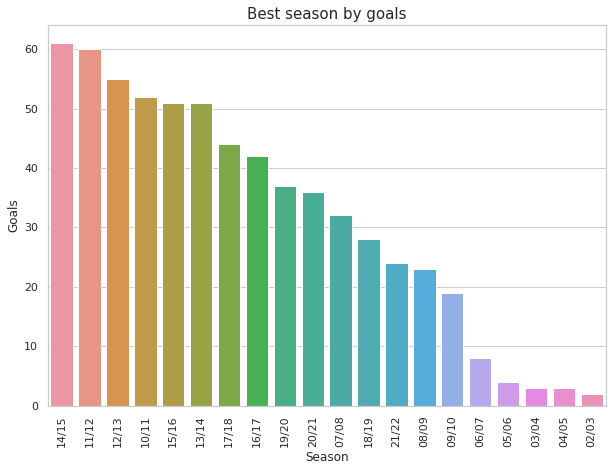

In [26]:
sns.countplot(x = df.Season,order=df.Season.value_counts().sort_values(ascending=False).index)
sns.set(rc={'figure.figsize':(10,7)})
plt.title('Best season by goals',fontsize=15)
plt.xlabel('Season')
plt.ylabel('Goals')
plt.xticks(rotation=90)
sns.set_style('whitegrid')

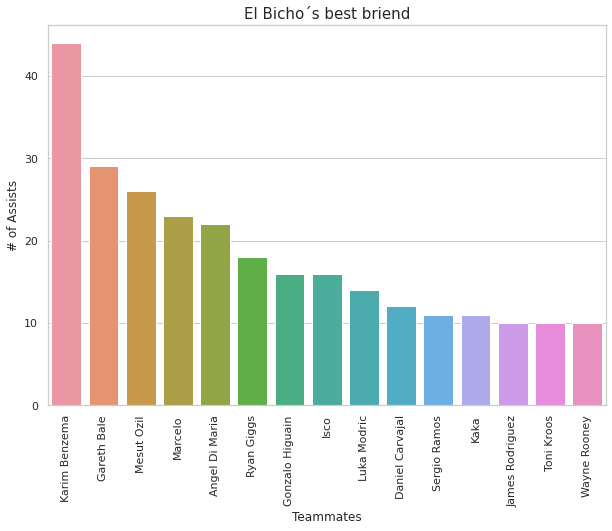

In [27]:
sns.countplot(x = assists,order=assists.value_counts().sort_values(ascending=False).index[:15])
sns.set(rc={'figure.figsize':(16,13)})
plt.title('El Bicho´s best briend',fontsize=15)
plt.xlabel('Teammates')
plt.ylabel('# of Assists')
plt.xticks(rotation=90)
sns.set_style('whitegrid')